In [7]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_dataset.csv",  encoding='ISO-8859-1', sep=',', error_bad_lines=False, index_col=0)

<ipython-input-3-a323c67d884c>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_dataset.csv",  encoding='ISO-8859-1', sep=',', error_bad_lines=False, index_col=0)
Skipping line 6233: expected 13 fields, saw 14
Skipping line 6319: expected 13 fields, saw 14
Skipping line 6487: expected 13 fields, saw 14
Skipping line 7837: expected 13 fields, saw 14
Skipping line 8075: expected 13 fields, saw 14
Skipping line 8531: expected 13 fields, saw 14
Skipping line 9834: expected 13 fields, saw 14
Skipping line 11351: expected 13 fields, saw 14
Skipping line 13211: expected 13 fields, saw 14
Skipping line 14098: expected 13 fields, saw 14
Skipping line 14932: expected 13 fields, saw 14
Skipping line 15167: expected 13 fields, saw 14
Skipping line 15265: expected 13 fields, saw 14
Skipping line 16162: expected 13 fields, saw 14
Skipping li

In [4]:
data1.head()

,Job_description,Length,Lemmatized_description,male_bias,female_bias,racial_bias,% male_bias,% female_bias,% racial_bias,male_bias_yes,female_bias_yes,racial_bias_yes
0,smb account executive identify qualify new opp...,303,"['smb', 'account', 'executive', 'identify', 'q...",6,2,0,1.980198,0.660066,0.000000,1,1,0
1,looking key new member join small talented pro...,246,"['looking', 'key', 'new', 'member', 'join', 's...",6,2,0,2.439024,0.813008,0.000000,1,1,0
2,looking data analyst software developer work r...,144,"['looking', 'data', 'analyst', 'software', 'de...",0,1,1,0.000000,0.694444,0.694444,0,1,1
3,creative virtual therefore seeking energetic e...,149,"['creative', 'virtual', 'therefore', 'seeking'...",1,3,0,0.671141,2.013423,0.000000,1,1,0
4,essential skills minimum bachelor degree equiv...,94,"['essential', 'skill', 'minimum', 'bachelor', ...",0,0,0,0.000000,0.000000,0.000000,0,0,0


#Adding Salary column

<ipython-input-8-21e4b96363a3>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data1['numerical_salary'] = data1['numerical_salary'].str.replace('$', '')


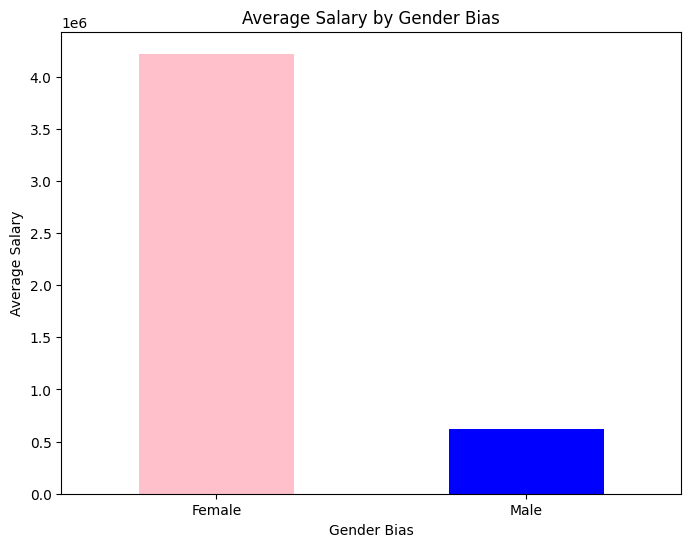

In [8]:
# Regular expression with capture groups to extract salary information
salary_regex = r'(\$?\d+,\d+|\$?\d+K|\$?\d+\.?\d+M|\$?\d+ - \$?\d+)'
data1['salary'] = data1['Job_description'].str.extract(salary_regex, flags=re.IGNORECASE, expand=False)

# For simplicity, we are focusing on salaries expressed in thousands (K) or directly in numbers
data1['numerical_salary'] = data1['salary'].str.replace('K', '000', case=False)
data1['numerical_salary'] = data1['numerical_salary'].str.replace('$', '')
data1['numerical_salary'] = pd.to_numeric(data1['numerical_salary'], errors='coerce')

# Fill NaN values with 0
data1['numerical_salary'].fillna(0, inplace=True)

# Create a new column for male/female bias
data1['gender_bias'] = np.where(data1['male_bias'] > data1['female_bias'], 'Male', 'Female')

# Calculate average salary for male and female-biased jobs
average_salaries = data1.groupby('gender_bias')['numerical_salary'].mean()

# Plotting
plt.figure(figsize=(8,6))
average_salaries.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Salary by Gender Bias')
plt.ylabel('Average Salary')
plt.xlabel('Gender Bias')
plt.xticks(rotation=0)
plt.show()

# Function to clean the job description

In [9]:

def clean_description(desc):
    # Remove HTML tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', desc)

    # Remove the phrases "Job Description" and "Duties"
    cleantext = re.sub(r'\bJob Description\b', '', cleantext, flags=re.IGNORECASE)
    cleantext = re.sub(r'\bDuties\b', '', cleantext, flags=re.IGNORECASE)

    # Optional: Remove other specific phrases like salary, address, etc.
    cleantext = re.sub(r'\bSalary\b', '', cleantext, flags=re.IGNORECASE)
    cleantext = re.sub(r'\bAddress\b', '', cleantext, flags=re.IGNORECASE)

    # Remove unwanted characters
    cleantext = cleantext.replace('â€', '').replace('â€TM', '')

    return cleantext

# Apply the cleaning function to the job description column
data1['Job_description'] = data1['Job_description'].apply(clean_description)

# Print the cleaned data
print(data1.head())




                                     Job_description  Length  \
0  smb account executive identify qualify new opp...     303   
1  looking key new member join small talented pro...     246   
2  looking data analyst software developer work r...     144   
3  creative virtual therefore seeking energetic e...     149   
4  essential skills minimum bachelor degree equiv...      94   

                              Lemmatized_description  male_bias  female_bias  \
0  ['smb', 'account', 'executive', 'identify', 'q...          6            2   
1  ['looking', 'key', 'new', 'member', 'join', 's...          6            2   
2  ['looking', 'data', 'analyst', 'software', 'de...          0            1   
3  ['creative', 'virtual', 'therefore', 'seeking'...          1            3   
4  ['essential', 'skill', 'minimum', 'bachelor', ...          0            0   

   racial_bias  % male_bias  % female_bias  % racial_bias  male_bias_yes  \
0            0     1.980198       0.660066       0.000000 

In [10]:
salary_counts = data1['salary'].value_counts()
salary_counts

401k     804
1k       234
5k       135
2k       132
0k        71
        ... 
979k       1
250m       1
375m       1
380k       1
1595k      1
Name: salary, Length: 234, dtype: int64

In [11]:
# Add a new column for the ratio of female_bias to male_bias - Handling the case when male_bias is 0 to avoid division by zero error
data1['ratio_female_male_bias'] = data1.apply(lambda x: x['female_bias'] / x['male_bias'] if x['male_bias'] != 0 else 0, axis=1)

In [12]:
data1

,Job_description,Length,Lemmatized_description,male_bias,female_bias,racial_bias,% male_bias,% female_bias,% racial_bias,male_bias_yes,female_bias_yes,racial_bias_yes,salary,numerical_salary,gender_bias,ratio_female_male_bias
0,smb account executive identify qualify new opp...,303,"['smb', 'account', 'executive', 'identify', 'q...",6,2,0,1.980198,0.660066,0.000000,1,1,0,NaN,0.0,Male,0.333333
1,looking key new member join small talented pro...,246,"['looking', 'key', 'new', 'member', 'join', 's...",6,2,0,2.439024,0.813008,0.000000,1,1,0,NaN,0.0,Male,0.333333
2,looking data analyst software developer work r...,144,"['looking', 'data', 'analyst', 'software', 'de...",0,1,1,0.000000,0.694444,0.694444,0,1,1,NaN,0.0,Female,0.000000
3,creative virtual therefore seeking energetic e...,149,"['creative', 'virtual', 'therefore', 'seeking'...",1,3,0,0.671141,2.013423,0.000000,1,1,0,NaN,0.0,Female,3.000000
4,essential skills minimum bachelor degree equiv...,94,"['essential', 'skill', 'minimum', 'bachelor', ...",0,0,0,0.000000,0.000000,0.000000,0,0,0,NaN,0.0,Female,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30215,job descriptiondescription robert half opening...,243,"['job', 'descriptiondescription', 'robert', 'h...",3,3,0,1.234568,1.234568,0.000000,1,1,0,NaN,0.0,Female,1.000000
30216,job descriptionexperis manpowergroup partnered...,121,"['job', 'descriptionexperis', 'manpowergroup',...",3,0,0,2.479339,0.000000,0.000000,1,0,0,NaN,0.0,Male,0.000000
30217,position summary shall job summary provide su...,427,"['job', 'description', 'position', 'summary', ...",2,11,1,0.468384,2.576112,0.234192,1,1,1,NaN,0.0,Female,5.500000
30218,job descriptiona burgeoning company located or...,147,"['job', 'descriptiona', 'burgeoning', 'company...",2,0,0,1.360544,0.000000,0.000000,1,0,0,NaN,0.0,Male,0.000000



#Univariate Visualizations:

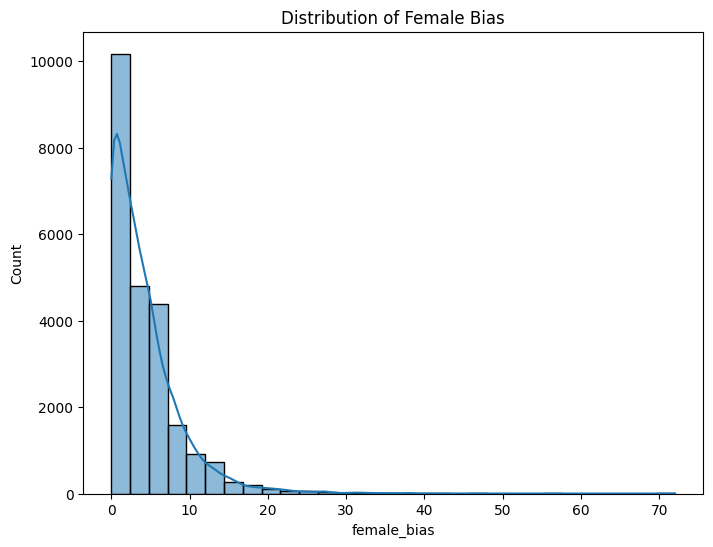

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of female_bias
plt.figure(figsize=(8,6))
sns.histplot(data1['female_bias'], bins=30, kde=True)
plt.title('Distribution of Female Bias')
plt.show()


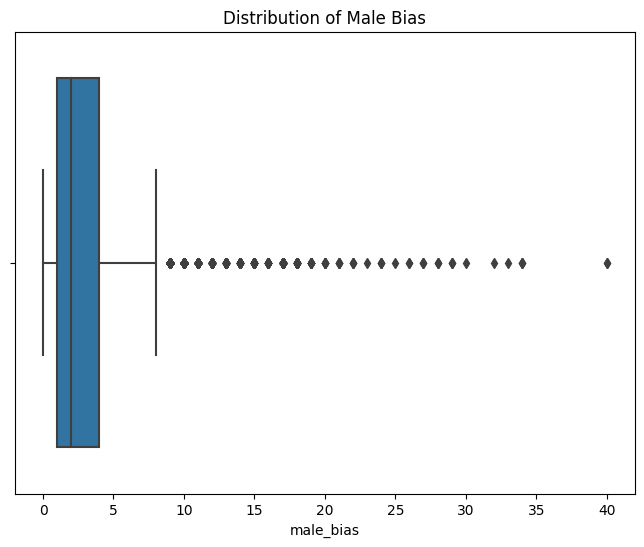

In [14]:
# Boxplot of male_bias
plt.figure(figsize=(8,6))
sns.boxplot(x=data1['male_bias'])
plt.title('Distribution of Male Bias')
plt.show()

# Bivariate/Multivariate Visualizations:

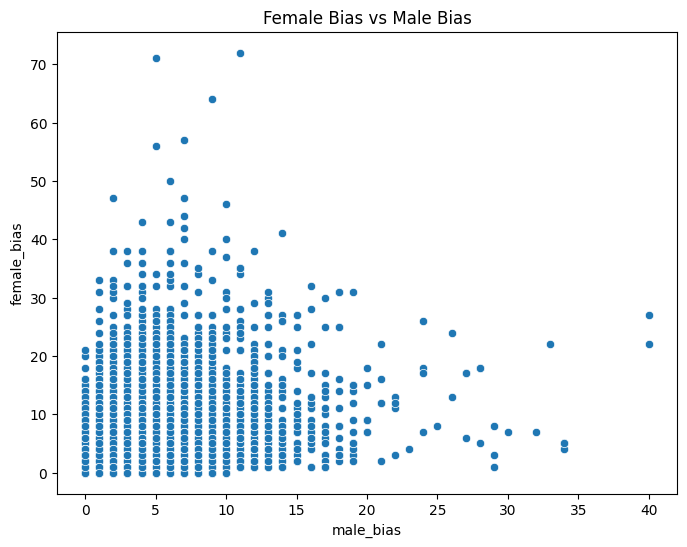

<ipython-input-15-14fa6d47212e>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')  # Updated this line to include 'numerical_salary'


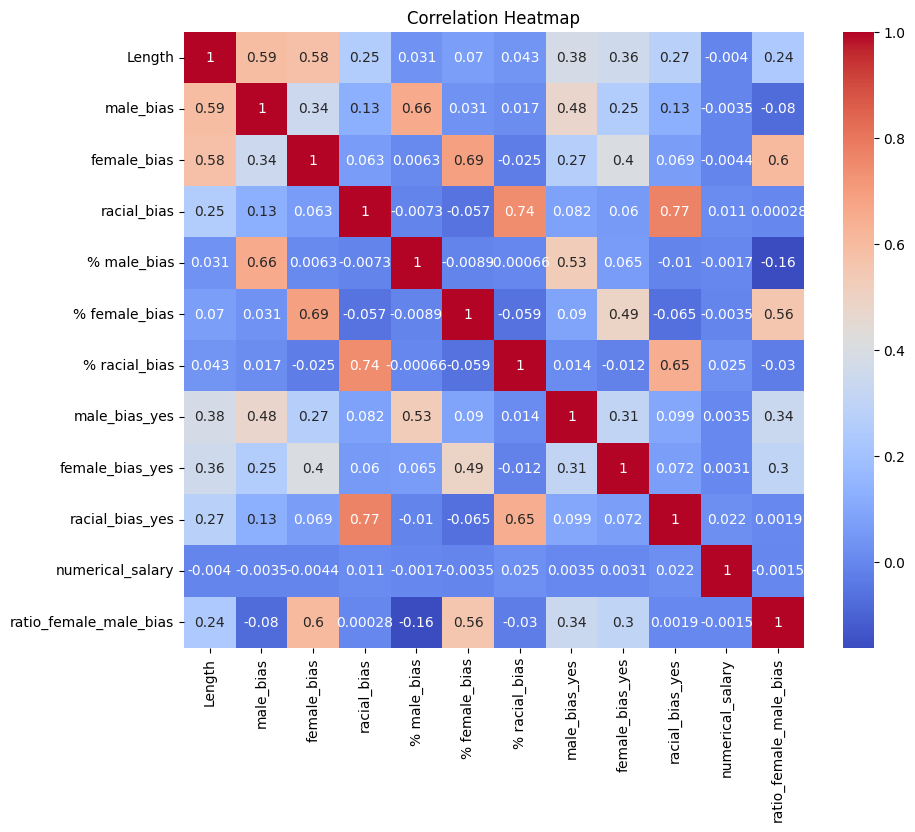

In [15]:
# Scatter plot of female_bias vs male_bias
plt.figure(figsize=(8,6))
sns.scatterplot(data=data1, x='male_bias', y='female_bias')
plt.title('Female Bias vs Male Bias')
plt.show()

data1['numerical_salary'] = pd.to_numeric(data1['numerical_salary'], errors='coerce')

plt.figure(figsize=(10,8))
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [16]:
# Descriptive statistics
print(data1.describe())


             Length     male_bias   female_bias   racial_bias   % male_bias  \
count  23372.000000  23372.000000  23372.000000  23372.000000  23372.000000   
mean     289.706615      3.120614      4.270965      0.144532      1.056940   
std      191.712163      3.205410      4.612181      0.570320      0.975711   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%      154.000000      1.000000      1.000000      0.000000      0.382959   
50%      258.000000      2.000000      3.000000      0.000000      0.884956   
75%      383.000000      4.000000      6.000000      0.000000      1.492537   
max     2307.000000     40.000000     72.000000     16.000000     18.181818   

       % female_bias  % racial_bias  male_bias_yes  female_bias_yes  \
count   23372.000000   23372.000000   23372.000000     23372.000000   
mean        1.415725       0.044069       0.806735         0.839594   
std         1.259469       0.206550       0.394868         0.366990   
min 

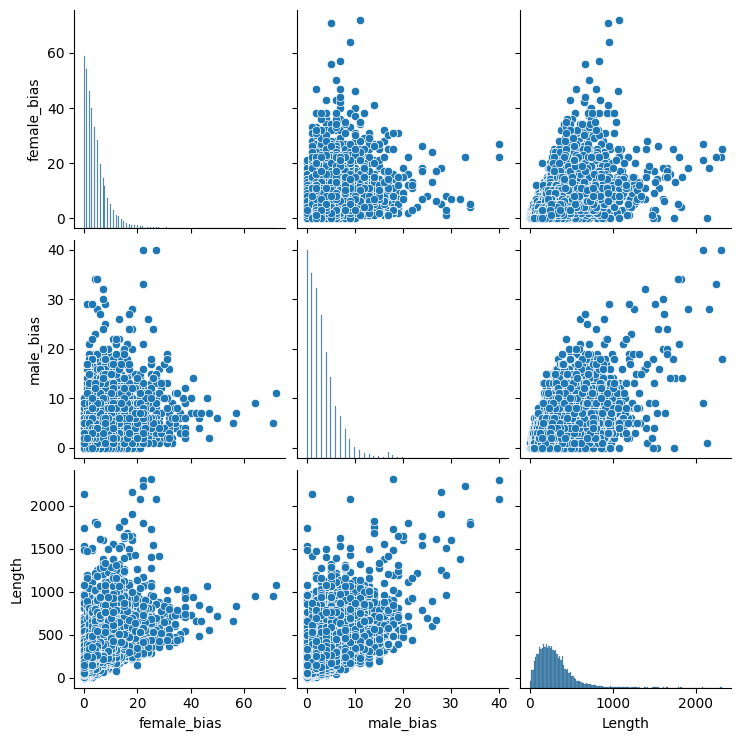

In [17]:
# Pairplot to visualize relationships between certain variables
selected_features = ['female_bias', 'male_bias', 'Length']
sns.pairplot(data1[selected_features])
plt.show()


In [18]:
data1.to_csv("final_dataset_task3.csv")